# Lab Assignment 08
The objective of this lab assignment is to process and analyze a dataset of Yelp reviews classified by sentiment (positive or negative) (`data_lab_08.csv`).

#### Instructions:
Complete each task and question by filling in the blanks (`...`) with one or more lines of code or text. Each task is worth **0.5 points** and each question is worth **1 point** (out of **10 points**).

#### Submission:
This assignment is due **Friday, December 13, at 11:59PM (Central Time)**.

This assignment must be submitted on Gradescope as a **PDF file** containing the completed code for each task and the corresponding output. **No late submissions will be accepted for this assignment**.

**This assignment is individual**. Offering or receiving any kind of unauthorized or unacknowledged assistance is a violation of the University’s academic integrity policies, will result in a grade of zero for the assignment, and will be subject to disciplinary action.

#### Installation instructions:
Install the `wordcloud` package by running the following command in the Anaconda prompt: `conda install -c conda-forge wordcloud`

In [36]:
# Install stopwords package
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kalya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [37]:
# Load libraries
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [38]:
# Load the dataset and display the first five rows
data = pd.read_csv('data_lab_08.csv')
data.head()

,text,class
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997 entries, 0 to 996
Data columns (total 3 columns):
text      997 non-null object
class     997 non-null int64
tokens    997 non-null object
dtypes: int64(1), object(2)
memory usage: 23.4+ KB


**Task 01 (of 10): Convert the text to lowercase.**

In [39]:
data['text'] = data['text'].str.lower()
data.head()

,text,class
0,wow... loved this place.,1
1,crust is not good.,0
2,not tasty and the texture was just nasty.,0
3,stopped by during the late may bank holiday of...,1
4,the selection on the menu was great and so wer...,1


**Task 02 (of 10): Remove punctuation and special characters (that is, every character that is not a letter, a digit, or a whitespace) from the text.**
_Hint:_ Use regular expressions and the `str.replace()` function.

In [40]:
data['text'] = data['text'].str.replace('[^\w\s]','')
data.head()

,text,class
0,wow loved this place,1
1,crust is not good,0
2,not tasty and the texture was just nasty,0
3,stopped by during the late may bank holiday of...,1
4,the selection on the menu was great and so wer...,1


In [41]:
# Print list of stop words
stop_list = stopwords.words('english')
print(stop_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [42]:
# Remove stop words from text
data['text'] = data['text'].apply(lambda x: " ".join([word for word in x.split() if word not in stop_list]))
data.head()

,text,class
0,wow loved place,1
1,crust good,0
2,tasty texture nasty,0
3,stopped late may bank holiday rick steve recom...,1
4,selection menu great prices,1


**Question 01 (of 05): What are the disadvantages of removing these stop words from the text?**

**Answer:** Removing stop words changed the sentiment of some texts. For example, consider the stop word "not", removing not changed the sentiment of some texts, such as "crust is not good" and "not tasty and the texture was just nasty".

**Task 03 (of 10): Stem the text.** _Hint:_ Use the `stem()` function. For a similar lambda function, see the code for removing stop words above.

In [43]:
st = PorterStemmer()
data['text'] = data['text'].apply(lambda x: "".join([st.stem(y) for y in x]))
#apply(lambda x: [stemmer.stem(y) for y in x])
data.head()

,text,class
0,wow loved place,1
1,crust good,0
2,tasty texture nasty,0
3,stopped late may bank holiday rick steve recom...,1
4,selection menu great prices,1


**Task 04 (of 10): Split the text into tokens.** _Hint:_ Use the `split()` function.

In [44]:
data['tokens'] = data['text'].apply(lambda x: x.split())
data.head()

,text,class,tokens
0,wow loved place,1,"[wow, loved, place]"
1,crust good,0,"[crust, good]"
2,tasty texture nasty,0,"[tasty, texture, nasty]"
3,stopped late may bank holiday rick steve recom...,1,"[stopped, late, may, bank, holiday, rick, stev..."
4,selection menu great prices,1,"[selection, menu, great, prices]"


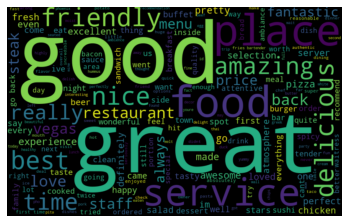

In [48]:
# Create word cloud using text from positive reviews
list_words_positive = []
for index, row in data.iterrows():
    if row['class'] == 1:
        list_words_positive.extend(row['tokens'])
all_words = ' '.join(list_words_positive)
wordcloud = WordCloud(width = 800, height = 500).generate(all_words)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

**Task 05 (of 10): Create a word cloud using the text from negative reviews.**

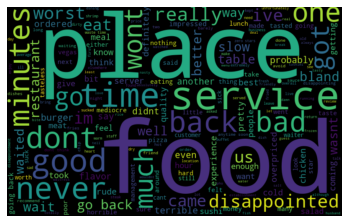

In [49]:
list_words_negative = []
for index, row in data.iterrows():
    if row['class'] == 0:
        list_words_negative.extend(row['tokens'])
all_words = ' '.join(list_words_negative)
wordcloud = WordCloud(width = 800, height = 500).generate(all_words)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

**Question 02 (of 05): What can you conclude from the word clouds?**

**Answer:** In case of word cloud for positive reviews, the words "great", "good", "food", "service" and "friendly" were appeared more frequently. Whereas in case of word cloud for negative reviews, the words "place", "food", "service", "time" and 'bad' were appeared more frequently.

**Task 06 (of 10): Convert the text into a matrix of word counts.**
_Hint:_ Use `sklearn`'s `CountVectorizer` object.

In [50]:
vectorizer = CountVectorizer()
count_matrix = vectorizer.fit_transform(data['text'])

**Task 07 (of 10): Print all the words in the word count matrix.**

In [53]:
print(vectorizer.get_feature_names())

['10', '100', '1199', '12', '15', '15lb', '17', '1979', '20', '2007', '23', '30', '30s', '34ths', '35', '40', '400', '40min', '45', '70', '785', '90', 'absolute', 'absolutely', 'absolutley', 'accident', 'accommodations', 'accomodate', 'accountant', 'ache', 'acknowledged', 'across', 'actual', 'actually', 'added', 'affordable', 'afternoon', 'ago', 'ahead', 'airline', 'airport', 'ala', 'albondigas', 'allergy', 'almonds', 'almost', 'alone', 'also', 'although', 'always', 'amazing', 'amazingrge', 'ambiance', 'ambience', 'amount', 'ample', 'andddd', 'angry', 'another', 'anticipated', 'anymore', 'anyone', 'anything', 'anytime', 'anyway', 'anyways', 'apart', 'apologize', 'apology', 'app', 'appalling', 'apparently', 'appealing', 'appetite', 'appetizer', 'appetizers', 'apple', 'approval', 'area', 'arent', 'arepas', 'aria', 'around', 'array', 'arrived', 'arrives', 'arriving', 'article', 'ask', 'asked', 'asking', 'assure', 'ate', 'atmosphere', 'atmosphere1', 'atrocious', 'attached', 'attack', 'atte

In [71]:
print(count_matrix.shape)

(997, 1955)


**Question 03 (of 05): How many different words are there in the dataset? List some examples.**

**Answer:** There are 1955 different words in the dataset, such as 
'absolute', 'absolutely', 'absolutley', 'accident', 'accommodations', 'accomodate', 'accountant', 'ache', 'acknowledged', 'across', 'actual', 'actually', 'added', 'affordable', 'afternoon', 'ago', 'ahead', 'airline', 'airport', 'ala', 'albondigas' etc.

**Task 08 (of 10): Print the first row and the first column of the word count matrix.**

In [70]:
print(count_matrix.toarray()[0])
print(count_matrix.toarray().transpose()[0])

[0 0 0 ... 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 

**Question 04 (of 05): How many words are there in the first review? How many reviews contain the word '10'?**

**Answer:** There are 3 words in the first review. And 5 reviews contain the word "10".

**Task 09 (of 10): Convert the text into a term frequency-inverse document frequency matrix.**
_Hint:_ Use `sklearn`'s `TfidfVectorizer` object.

In [67]:
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(data['text'])

**Task 10 (of 10): Print the first row and the first column of the term frequency-inverse document frequency matrix.**

In [68]:
print(tfidf_matrix.toarray()[0])
print(tfidf_matrix.toarray().transpose()[0])

[0. 0. 0. ... 0. 0. 0.]
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.34105351
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0

**Question 05 (of 05): What is the term frequency-inverse document frequency of the word '10' in the 60th review?**

**Answer:** The term frequency-inverse document frequency of the word '10' in the 60th review is 0.3410